# Trabalho MVP 
### 	Bruno Gazoni 7585037<br> 	Matheus Steigenberg Populim 10734710<br> Rafael Ceneme 	9898610<br> 	Bruno Baldissera  10724351

# Importando as bibliotecas necessárias

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Lendo a imagem de entrada

In [2]:
name1 = "img10.png"
A = imageio.imread(name1)
print(A.shape)

(1500, 1500, 3)


In [9]:
def get_average_filter(A):
    N = A.shape[0] # size of img
    n = 100
    C = np.zeros((N//n,N//n),dtype=np.float32)


    for i in range(N//n):
        for j in range(N//n):
            C[i,j] = np.average(A[i*n:(i+1)*n,j*n:(j+1)*n])


    C = np.kron(C,np.ones((n,n)))

    return C

def normalize_one(A):
    a = A.min()
    b = A.max()
    A = ((A-a)/(b-a))
    return A

def gamma_correction(A,gamma):
    B = np.zeros((A.shape))
    B = 255*(np.power(A/255.0,1.0/gamma))
    B = normalize(B)
    return B

def normalize(A):
    a = A.min()
    b = A.max()
    A = ((A-a)/(b-a))*255
    A = A.astype(np.uint8)
    return A


img_hsv = mpl.colors.rgb_to_hsv(A)

teste = 1-img_hsv[:,:,1]


media = get_average_filter(teste)

teste = normalize_one(teste - media)
print(teste)
teste_gamma = gamma_correction(teste,0.8)
print(teste_gamma)

[[0.55041405 0.59937972 0.60952953 ... 0.73194993 0.75748816 0.65693905]
 [0.58733526 0.56381995 0.58980437 ... 0.74441361 0.75164026 0.70997408]
 [0.69535875 0.40414345 0.09351376 ... 0.78162229 0.72386282 0.68506815]
 ...
 [0.84160383 0.84160383 0.84160383 ... 0.850562   0.85488722 0.85093194]
 [0.84160383 0.84160383 0.84160383 ... 0.85093194 0.85488722 0.85488722]
 [0.84160383 0.84160383 0.84160383 ... 0.85093194 0.85897887 0.85481746]]
[[120 134 137 ... 172 180 150]
 [131 124 131 ... 176 178 166]
 [161  82  13 ... 187 170 158]
 ...
 [205 205 205 ... 208 209 208]
 [205 205 205 ... 208 209 209]
 [205 205 205 ... 208 210 209]]


[[107.  82.  89. ...  79.  76.  79.]
 [ 12. 126. 100. ...  82.  80.  64.]
 [ 16.  31.   3. ...  84.  80.  79.]
 ...
 [255. 255. 255. ... 177. 179. 181.]
 [255. 255. 255. ... 181. 179. 179.]
 [255. 255. 255. ... 181. 178. 178.]] aqui em cima
aqui


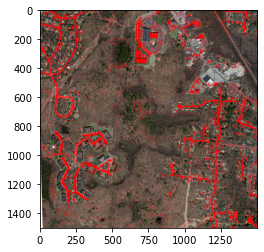

In [10]:
valor = img_hsv[:,:,2]
print(valor, "aqui em cima")
print("aqui")

f_tr = np.ones(teste.shape).astype(np.uint8)
# setting to 0 the pixels below the threshold
# f_tr = A[:,:,0]
A[(np.where((teste_gamma > 180) & (valor < 200) & (valor > 90)))] = [255,0,0]

plt.imshow(A)
plt.show()



plt.show()